In [2]:
# calling Dataset

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', None)

file_path = r'C:\Users\Gebruiker\OneDrive\Documents\09 Ironhack\07 Bootcamp\05 Week 5 - EDA and Inferential Stats\02 W5 - Codes\amz_uk_price_prediction_dataset.csv'
df = pd.read_csv(file_path)


In [3]:
df = df.copy()
df.head(3)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers


In [4]:
df.shape

(2443651, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [6]:
# Extracting column names with numerical data types from the dataframe
df.select_dtypes("number").columns

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

In [7]:
# Retrieving column names with object (typically string) data types from the dataframe
df.select_dtypes("object").columns

Index(['asin', 'title', 'category'], dtype='object')

In [8]:
df_number = df.select_dtypes("number")
df_number.head(3)


,uid,stars,reviews,price,boughtInLastMonth
0,1,4.7,15308,21.99,0
1,2,4.7,98099,23.99,0
2,3,4.7,15308,21.99,0


In [9]:
df_categorical = df.select_dtypes("object")
df_categorical.head(3)

,asin,title,category
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",Hi-Fi Speakers


# Part 1: Understanding Product Categories

Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

### 1. Frequency Tables:

- Generate a frequency table for the product category.
- Which are the top 5 most listed product categories?

In [10]:
df.isnull().sum()

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [19]:
# Frequency table for product category 

frequency_table = df['category'].value_counts()
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [100]:
# Find top 5 most listed product category with a crosstab table


listed_product = pd.crosstab(index = df['category'], columns="count").sort_values(by='count', ascending=False)
top_5_most_listed_product_category = listed_product.head(5)

top_5_most_listed_product_category

col_0,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978


### 2. Visualizations:

- Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
- For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_16276\3206789630.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_frequency_table.index, y=top_5_frequency_table.values, palette="Set3");


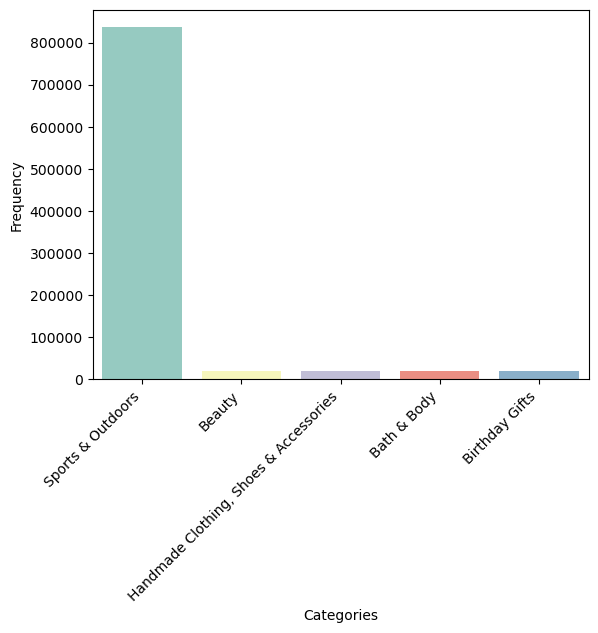

In [101]:
top_5_frequency_table = frequency_table.head(5)

sns.barplot(x=top_5_frequency_table.index, y=top_5_frequency_table.values, palette="Set3");

plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.xlabel('Categories')
plt.show()

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_9720\1307980870.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='category', order=frequency_table.index, palette='viridis')


<function matplotlib.pyplot.show(close=None, block=None)>

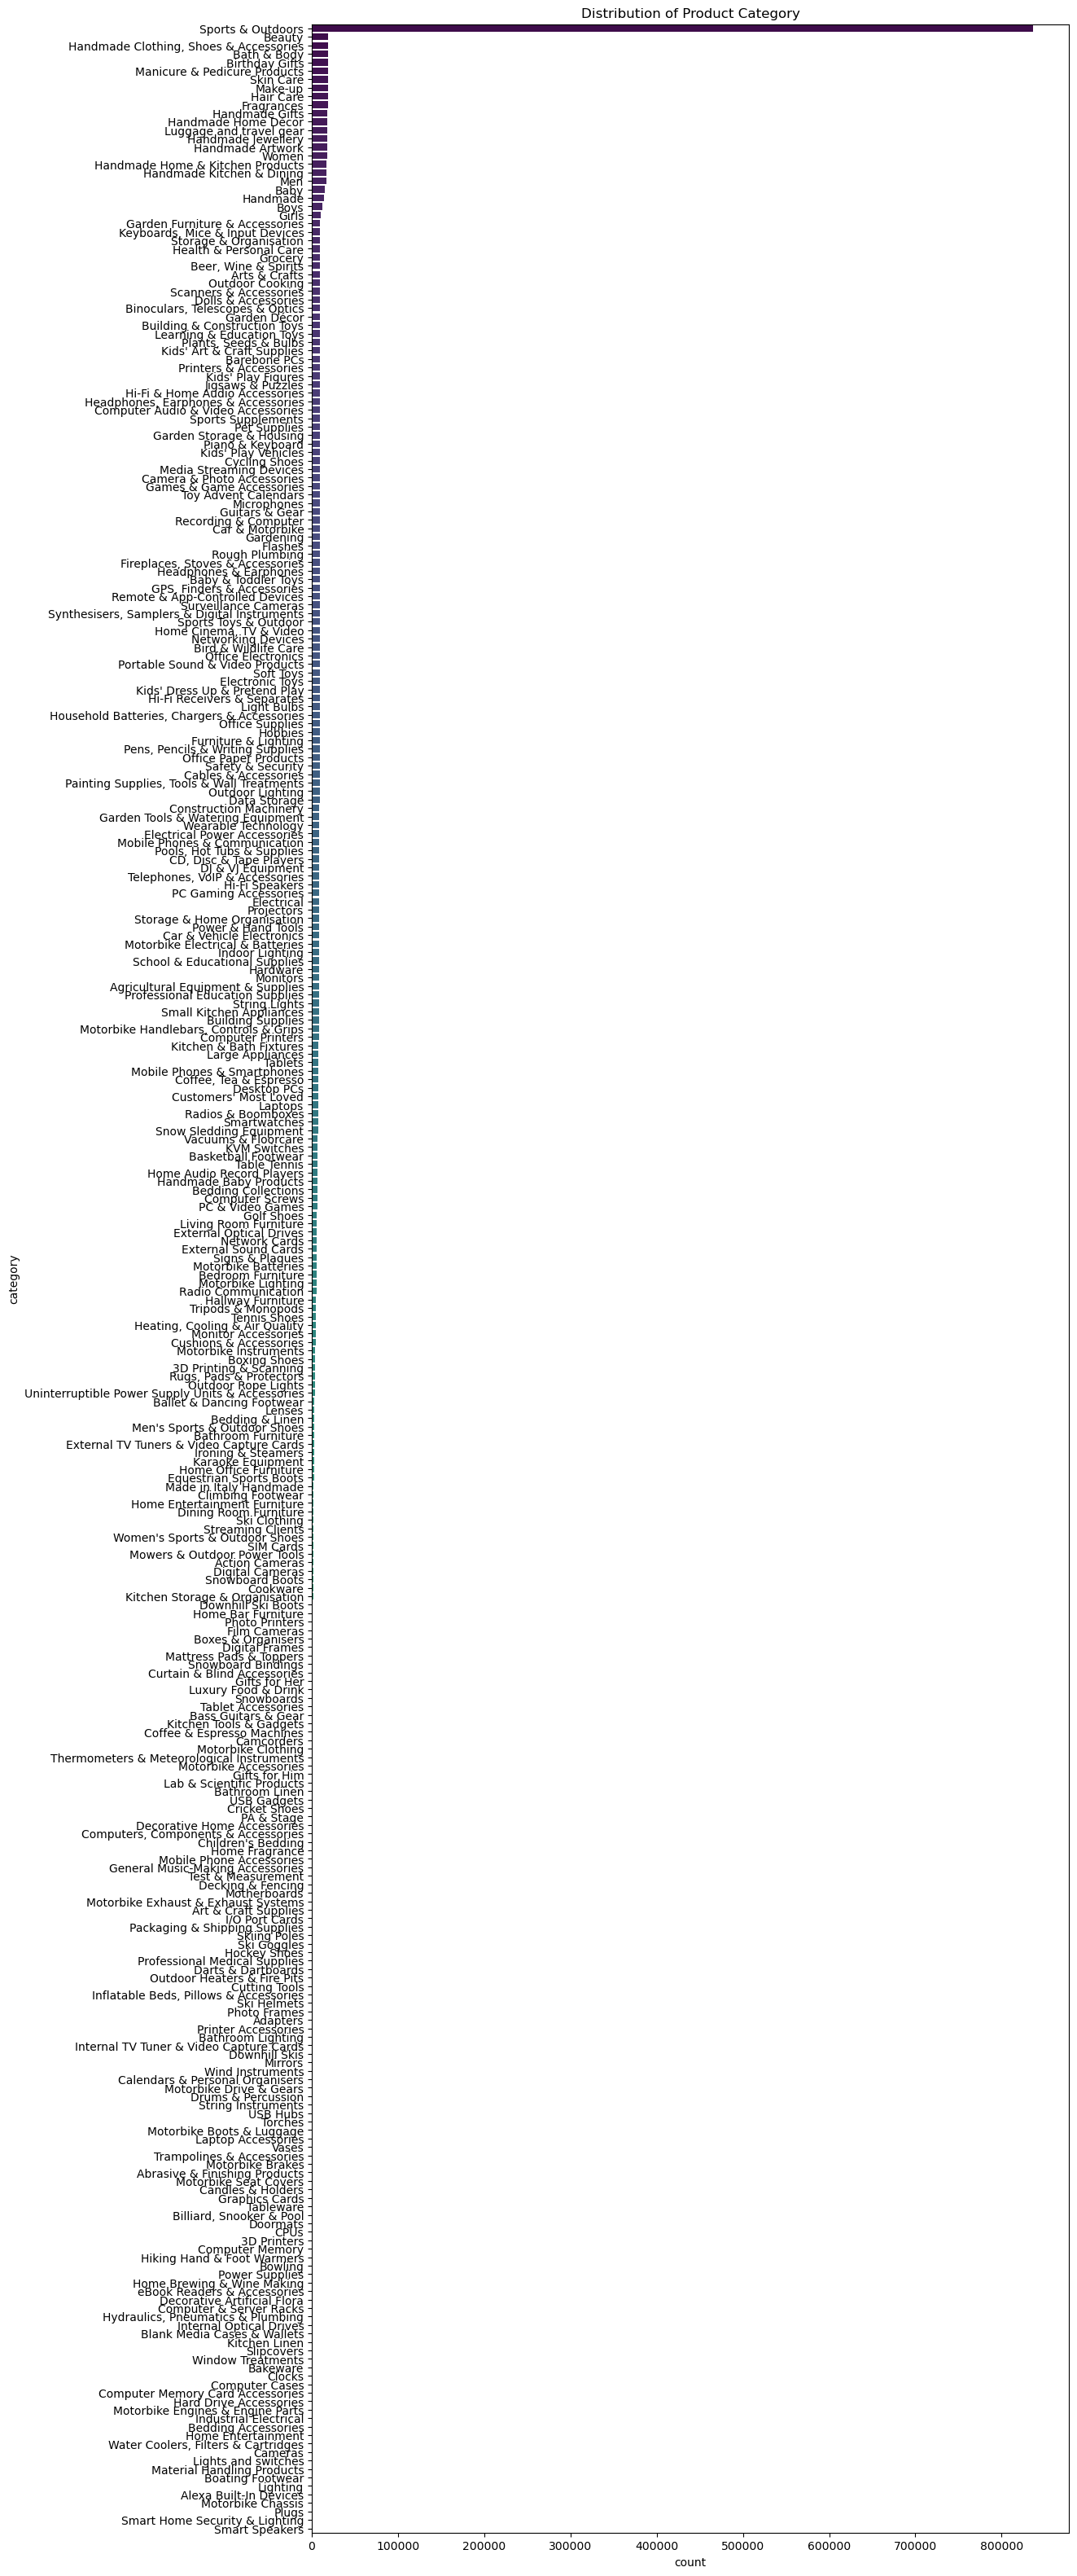

In [22]:
plt.figure(figsize=(12,40))
sns.countplot(data=df, y='category', order=frequency_table.index, palette='viridis')
plt.title('Distribution of Product Category')
plt.show

In [102]:
# Calculating the proportion of each unique value in the product category
proportion_table = (top_5_most_listed_product_category['count']/top_5_most_listed_product_category['count'].sum())

proportion_table

category
Sports & Outdoors                         0.916077
Beauty                                    0.021155
Handmade Clothing, Shoes & Accessories    0.021064
Bath & Body                               0.020914
Birthday Gifts                            0.020789
Name: count, dtype: float64

<Axes: ylabel='count'>

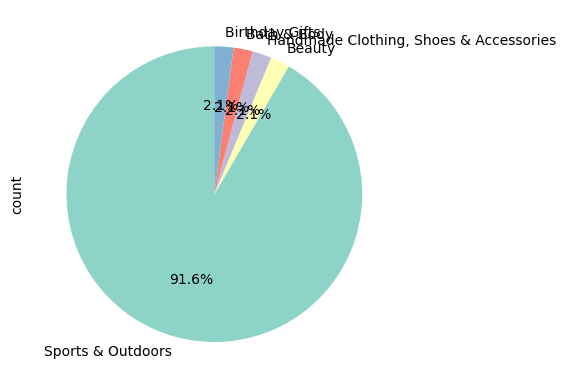

In [103]:
# Pie plot for proportion table

proportion_table.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))


# Part 2: Delving into Product Pricing

Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

### 1. Measures of Centrality:

- Calculate the mean, median, and mode for the price of products.
- What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [104]:
df.head(3)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers


In [24]:
mean_price = round(df['price'].mean(),2)
median_price = round(df['price'].median(),2)
mode_price = round(df['price'].mode()[0],2)

print("The mean of the price is", mean_price)
print("The median of the price is", median_price)
print("The mode of the price is", mode_price)

The mean of the price is 89.24
The median of the price is 19.09
The mode of the price is 9.99


The average price point of products listed is bigger than the most common price point. It means that there are a lot of product with cheap price than expensive price. We will see this clearer in the visualization.

### 2. Measures of Dispersion:

- Determine the variance, standard deviation, range, and interquartile range for product price.
- How varied are the product prices? Are there any indicators of a significant spread in prices?

In [25]:
# use .describe method to show variance, standard deviation, range, and interquartile range
variance_price = round(df['price'].var(),2)
std_dev_price = round(df['price'].std(),2)
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

print("The variance is", variance_price)
print("The standard deviation is", std_dev_price)
print("The range is", range_price)
print("The interquartile range is", IQR)


The variance is 119445.49
The standard deviation is 345.61
The range is 100000.0
The interquartile range is 36.0


In [107]:
df['price'].describe()

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [108]:
skewness_price = round(df['price'].skew(),2)
kurtosis_price = round(df['price'].kurtosis(),2)

skewness_price, kurtosis_price

(27.49, 4241.62)

The std is much higher than the mean value, which indicates wide variabilities. <br>
The skewness is more than one, which shows a right-skewed distribution.

### 3. Visualizations:

- Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved.
- Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [109]:
filtered_rows = df[df['price'] == 100000.0]

<Axes: xlabel='price', ylabel='Count'>

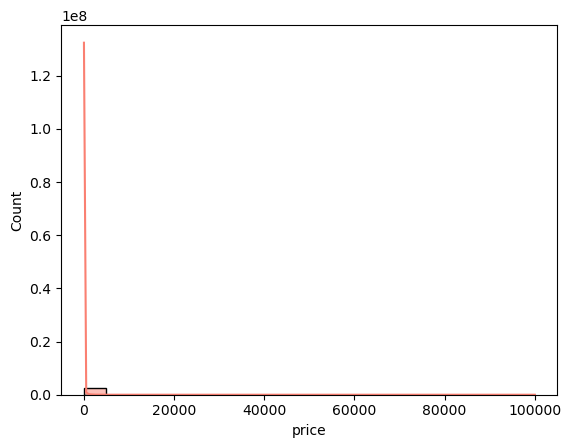

In [26]:
# Plotting a histogram for the 'price' column of the 'df' dataframe
# 'kde=True' adds a Kernel Density Estimate plot to give an approximation of the data's distribution
# 'bins=30' divides the data into 30 bins for more detailed granularity
# 'color="salmon"' sets the color of the bars to salmon

sns.histplot(df['price'], kde=True, bins=20, color="salmon")

<Axes: xlabel='price', ylabel='Count'>

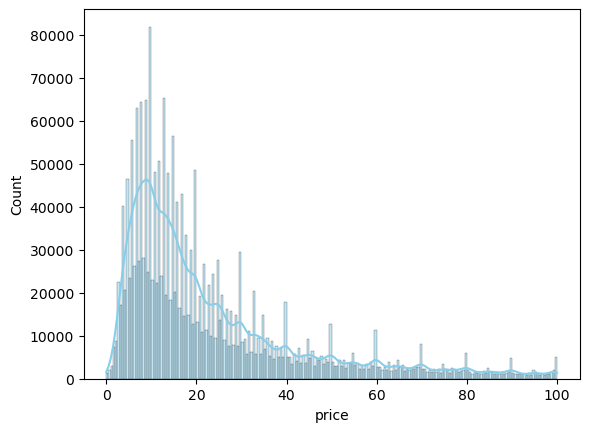

In [27]:
sns.histplot(df[df['price']<100]['price'], kde=True, bins=200, color="skyblue")

# Part 3: Unpacking Product Ratings

Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

### 1. Measures of Centrality:

- Calculate the mean, median, and mode for the rating of products.
- How do customers generally rate products? Is there a common trend?

In [111]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [28]:
mean_rating = round(df['stars'].mean(),2)
median_rating = round(df['stars'].median(),2)
mode_rating = round(df['stars'].mode()[0],2)

print("The mean of the rating is", mean_rating)
print("The median of the rating is", median_rating)
print("The mode of the rating is", mode_rating)

The mean of the rating is 2.15
The median of the rating is 0.0
The mode of the rating is 0.0


### 2. Measures of Dispersion:

- Determine the variance, standard deviation, and interquartile range for product rating.
- Are the ratings consistent, or is there a wide variation in customer feedback?

In [29]:
variance_rating = round(df['stars'].var(),2)
std_dev_rating = round(df['stars'].std(),2)
min_rating = df['stars'].min()
max_rating = df['stars'].max()
range_rating = max_rating - min_rating
Q1 = df['stars'].quantile(0.25)
Q3 = df['stars'].quantile(0.75)
IQR = Q3 - Q1
quantiles_rating = df['stars'].quantile([0.25, 0.5, 0.75])

print("The variance is", variance_rating)
print("The standard deviation is", std_dev_rating)
print("The range is", range_rating)
print("The interquartile range is", IQR)

The variance is 4.82
The standard deviation is 2.19
The range is 5.0
The interquartile range is 4.4


### 3. Shape of the Distribution:

- Calculate the skewness and kurtosis for the rating column.
- Are the ratings normally distributed, or do they lean towards higher or lower values?

In [122]:
skewness_rating = round(df['stars'].skew(),2)
kurtosis_rating = round(df['stars'].kurtosis(),2)

skewness_rating, kurtosis_rating

(0.08, -1.93)

### 4. Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

<Axes: xlabel='stars', ylabel='Count'>

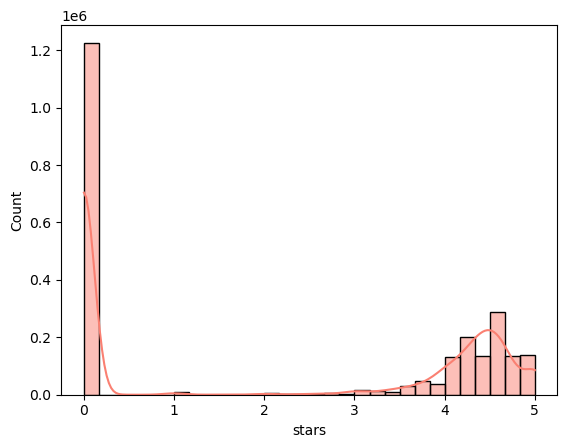

In [121]:
# Plotting a histogram for the 'price' column of the 'df' dataframe
# 'kde=True' adds a Kernel Density Estimate plot to give an approximation of the data's distribution
# 'bins=30' divides the data into 30 bins for more detailed granularity
# 'color="salmon"' sets the color of the bars to salmon

sns.histplot(df['stars'], kde=True, bins=30, color="salmon")